In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

/Users/zionwang/opt/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
df_raw = pd.read_feather('tmp/Titanic_raw')
df_trn, y_trn, nas = proc_df(df_raw, 'Survived')

In [26]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 178
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [8]:
x_sub = X_train[['Last Name', 'Sex']]

In [9]:
?split_vals

In [10]:
?iloc

Object `iloc` not found.


In [37]:
class Tree():
    def __init__(self, x, y, n_trees, sample_sz, min_leaf=5):
        np.random.seed(42)
        self.x,self.y,self.sample_sz,self.min_leaf = x,y,sample_sz,min_leaf
        self.forest = [self.create_tree() for i in range(n_trees)]
    
    def create_tree(self):
        rnd_index = np.random.permutation(len(self.y))[:self.sample_sz]
        return DecisionTree(self.x.iloc[rnd_index], self.y[rnd_index], min_leaf=self.min_leaf)
    
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)
        

In [38]:
class DecisionTree():
    def __init__(self, x, y, idxs=None, min_leaf=5):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    # This just does one decision; we'll make it recursive later
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'):
            return
        x = self.split_col
        lhs = 
            
    # We'll write this later!
    def find_better_split(self, var_idx): pass
    
    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

In [39]:
def find_better_split(self, var_idx):
    x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
    
    sort_idx = np.argsort(x)
    sort_y,sort_x = y[sort_idx], x[sort_idx]
    rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
    lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

    for i in range(0,self.n-self.min_leaf):
        xi,yi = sort_x[i],sort_y[i]
        lhs_cnt += 1; rhs_cnt -= 1
        lhs_sum += yi; rhs_sum -= yi
        lhs_sum2 += yi**2; rhs_sum2 -= yi**2
        if i<self.min_leaf-1 or xi==sort_x[i+1]:
            continue
            
        lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
        rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
        curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
        if curr_score<self.score: 
            self.var_idx,self.score,self.split = var_idx,curr_score,xi

Object `DataFame.argsort` not found.


In [40]:
m = Tree(X_train, y_train, n_trees=10, sample_sz=300, min_leaf=3)

In [41]:
m.forest[0]

n: 300; val:0.38666666666666666

In [42]:
ens = Tree(x_sub, y_train, 1, 1000)
tree = ens.forest[0]
x_samp,y_samp = tree.x, tree.y
x_samp.columns

IndexError: positional indexers are out-of-bounds

In [24]:
tree

n: 0; val:nan

In [33]:
m = RandomForestRegressor(n_estimators=1, max_depth=1, bootstrap=False)
m.fit(x_samp, y_samp)
draw_tree(m.estimators_[0], x_samp, precision=2)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [133]:
class ZionForest():
    def __init__(self, x, y, numberTree, samplesz, leafnode = 10):
        self.x, self.y, self.numberTree, self.samplesz, self.leafnode = x, y, numberTree, samplesz, leafnode
        self.forest = [self.maketree() for i in range(numberTree)]
        
    def maketree(self):
        idxs = np.random.permutation(len(self.y))[:self.samplesz]
        return DecisionTree(self.x.iloc[idxs], self.y[idxs], index=np.array(range(self.samplesz)), leafnode=self.leafnode)
    
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.forest], axis=0)
    
    def featimportance(self, x):
        features = x.shape[1]
        predictions = np.array(range(features))
        preds = predict(x)
        for t in features:
            xcopy = x
            xcopy = np.random.shuffle(xcopy[:, t])
            predictions[t] = np.mean(predict(xcopy) - preds)
        return answer
    
    #need to take a slice of the column that i want to shuffle, x[:, t] to take that slice, x[:, t].copy()

In [134]:
def std_agg(cnt, s1, s2): 
    return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [309]:
class DecisionTree():
    def __init__(self, x,  y, index, leafnode = 10):
        self.root = Nodes(x, y, index, leafnode)
        
    def predict(self, x):
        return np.array([self.root.predict_row(xi) for xi in x])
    
    #draw and display tree
    #def draw(self):
        
    
    def __repr__(self):
        s = f" {self.root}"
        #f = '\n'
        #s = f'bruh {f} stuff'
        return s
        

In [319]:
class Nodes():
    def __init__(self, x, y, index, leafnode):
        self.x, self.y, self.index, self.leafnode = x, y, index, leafnode
        self.col = x.shape[1]
        self.num = len(index)
        self.variance = np.mean(y[index])
        self.score = float("inf")
        # if self.num < self.leafnode
        self.beginsplits()
    
    def beginsplits(self):
        for i in range(self.col):
            self.findbestsplit(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = Nodes(self.x, self.y, self.index[lhs], self.leafnode)
        self.rhs = Nodes(self.x, self.y, self.index[rhs],  self.leafnode)
        
    def findbestsplit(self, var_idx):
        x, y = self.x.values[self.index, var_idx], self.y[self.index]
        sort_idx = np.argsort(x)
        sort_y, sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.num, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.
        for i in range(0,self.num-self.leafnode):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.leafnode-1 or xi==sort_x[i+1]:
                continue
            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi
                
    @property
    def split_col(self): return self.x.values[self.index,self.var_idx]
    
    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    def __repr__(self):
        s = f"n: {self.num}; val:{self.variance}"
        if not self.score == float('inf'):
            s += f" score:{self.score}; split:{self.split}; var:{self.split_name}"
            s += f"                                                                                         {self.rhs}"
            s += f"                                                                                         {self.lhs}"
        else:
            s += f" Leafnode: TRUE"
        return s
    
    def predict_row(self, xi):
        if self.score == float('inf'):
            return self.variance
        if xi[self.var_idx] <= self.split:
            t = self.lhs
        else:
            t = self.rhs
        return t.predict_row(xi)

In [294]:
?os.linesep

In [246]:
m = ZionForest(X_train, y_train, numberTree=10, samplesz=500, leafnode=3)

In [247]:
preds = m.predict(X_valid.values)

In [248]:
#stuff = m.featimportance(X_valid.values)

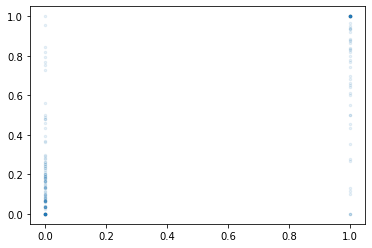

In [249]:
plt.scatter(y_valid, preds, alpha=0.1, s=6);

In [250]:
metrics.r2_score(y_valid, preds)

0.536180127290852

In [284]:
%time tree = ZionForest(X_train, y_train, 1, 70).forest[0]
x_samp,y_samp = tree.root.x, tree.root.y

CPU times: user 19.4 ms, sys: 4.89 ms, total: 24.3 ms
Wall time: 25.4 ms


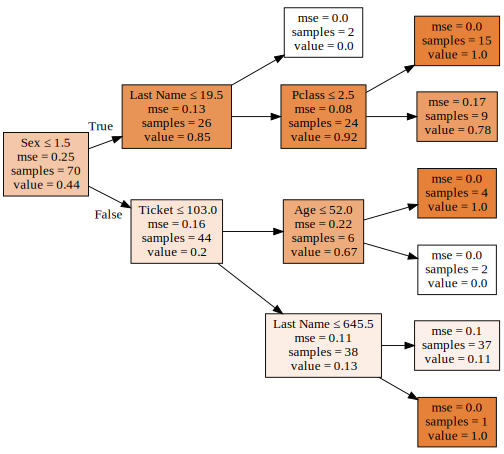

In [252]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False)
m.fit(x_samp, y_samp)
draw_tree(m.estimators_[0], x_samp, precision=2, ratio=0.9, size=7)

In [253]:
?draw_tree

In [320]:
tree = ZionForest(X_train, y_train, 1, 400).forest[0]
x_samp,y_samp = tree.root.x, tree.root.y
repr(tree)

' n: 400; val:0.4 score:162.1116048053349; split:1; var:Sex                                                                                         n: 261; val:0.19923371647509577 score:98.74043653846496; split:238; var:Ticket                                                                                         n: 181; val:0.1270718232044199 score:55.91498646875539; split:497; var:Ticket                                                                                         n: 84; val:0.21428571428571427 score:32.17534287953807; split:75; var:Cabin                                                                                         n: 10; val:0.6 Leafnode: TRUE                                                                                         n: 74; val:0.16216216216216217 score:26.184768511938252; split:462; var:Last Name                                                                                         n: 28; val:0.07142857142857142 score:4.0; split:581; var:Last Name 

In [272]:
x_samp.shape

(400, 12)

In [273]:
preds = tree.predict(X_valid.values)

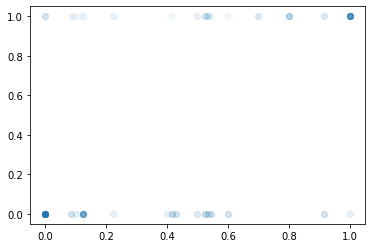

In [274]:
plt.scatter(preds, y_valid, alpha=0.05)

In [258]:
metrics.r2_score(preds, y_valid)

-0.11281778272450671

CPU times: user 4.19 ms, sys: 898 µs, total: 5.09 ms
Wall time: 4.32 ms


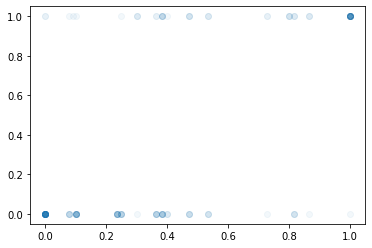

In [259]:
m = RandomForestRegressor(n_estimators=1, min_samples_leaf=10, bootstrap=False)
%time m.fit(x_samp, y_samp)
preds = m.predict(X_valid.values)
plt.scatter(preds, y_valid, alpha=0.05)

In [260]:
metrics.r2_score(preds, y_valid)

-0.04291747000830659

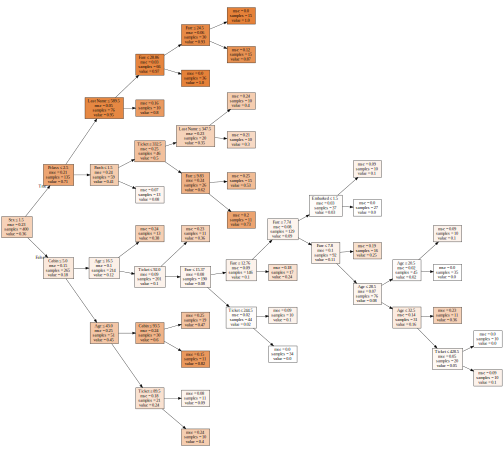

In [261]:
draw_tree(m.estimators_[0], x_samp, precision=2, ratio=0.9, size=7)

In [321]:
repr(tree)

' n: 400; val:0.4 score:162.1116048053349; split:1; var:Sex                                                                                         n: 261; val:0.19923371647509577 score:98.74043653846496; split:238; var:Ticket                                                                                         n: 181; val:0.1270718232044199 score:55.91498646875539; split:497; var:Ticket                                                                                         n: 84; val:0.21428571428571427 score:32.17534287953807; split:75; var:Cabin                                                                                         n: 10; val:0.6 Leafnode: TRUE                                                                                         n: 74; val:0.16216216216216217 score:26.184768511938252; split:462; var:Last Name                                                                                         n: 28; val:0.07142857142857142 score:4.0; split:581; var:Last Name 

In [333]:
cols = ['Age','Last Name','Sex']

In [337]:
for i in range(10):
    tree = ZionForest(X_train[cols], y_train, numberTree=1, samplesz=400, leafnode=i+1).forest[0]
    x_samp,y_samp = tree.root.x, tree.root.y
    preds1 = tree.predict(X_valid[cols].values)
    m = RandomForestRegressor(n_estimators=1, min_samples_leaf= i+1, bootstrap=False)
    m.fit(x_samp, y_samp)
    preds2 = m.predict(X_valid[cols].values)
    print('i')
    print(metrics.r2_score(preds1, y_valid)-metrics.r2_score(preds2, y_valid))
    print('\n')

i
-0.04664570230607956


i
0.12779147584724249


i
-0.1697955782531353


i
0.057440468046180415


i
0.0018787124703105729


i
0.4118098114525821


i
0.040959522892190625


i
0.14570526950321283


i
-0.3443742288174023


i
-0.062078275378611325




In [338]:
tree = ZionForest(X_train[cols], y_train, numberTree=1, samplesz=400, leafnode=5).forest[0]
x_samp,y_samp = tree.root.x, tree.root.y
preds1 = tree.predict(X_valid[cols].values)

In [341]:
m = RandomForestRegressor(n_estimators=1, min_samples_leaf= 5, bootstrap=False)
m.fit(x_samp, y_samp)
preds2 = m.predict(X_valid[cols].values)

In [339]:
repr(tree)

' n: 400; val:0.3825 score:166.4419274743404; split:1.0; var:Sex                                                                                         n: 265; val:0.2037735849056604 score:103.76331990897312; split:168.0; var:Last Name                                                                                         n: 198; val:0.15656565656565657 score:67.7347768875044; split:50.0; var:Age                                                                                         n: 19; val:0.0 score:0.0; split:54.0; var:Age                                                                                         n: 13; val:0.0 score:0.0; split:61.0; var:Age                                                                                         n: 7; val:0.0 Leafnode: TRUE                                                                                         n: 6; val:0.0 Leafnode: TRUE                                                                                         n: 6; val

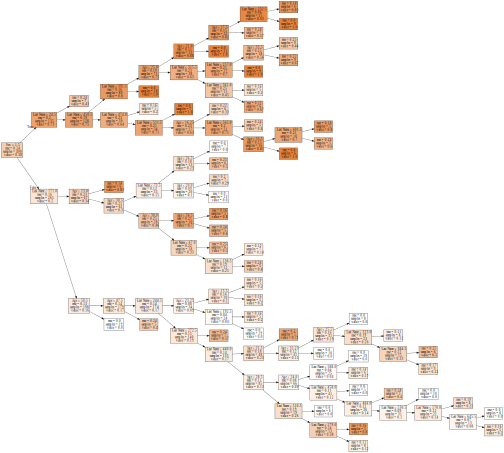

In [342]:
draw_tree(m.estimators_[0], x_samp, precision=2, ratio=0.9, size=7)